In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.ticker as ticker

#set display options
pd.set_option('display.max_columns', None)
plt.style.use('default')

%matplotlib inline

In [ ]:
#load the csv
df = pd.read_csv("netflix_content_2023.csv")

#display basic info
print("Data Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nStatistical Summary:")
print(df.describe())

df

In [ ]:
print("Missing Values Per Column:")
print(df.isnull().sum())
df['Release Date'] = pd.to_datetime(df['Release Date'])

df.set_index('Release Date', inplace=True)

print("Missing Values Per Collumn:")
print(df.isnull().sum())

df.sort_index(inplace=True)

print("\nProcessed Data:")
df

In [ ]:
# Create a simple line plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Hours Viewed'])
plt.title('Hours Watched Over Time')
plt.xlabel('Release Date')
plt.ylabel("Hours Watched")
plt.grid(True, alpha=0.3)

fig, axs = plt.subplots(1, 1, figsize=(12, 10), layout='constrained')
print(type(df['Hours Viewed']))

sjs = df['Hours Viewed'].str.replace(',', '')
sjs = sjs.astype(int)

axs.plot(df.index, sjs)
axs.set_title('Hours Watched Over Time')
axs.set_yticks(np.arange(0, 1000000000, 1000000000/10))
axs.set_ylabel('Hours Watched (In Hundred Millions)')
#axs.set_yticklabels(fontdict={'fontsize': 10})

plt.show()

In [42]:
# Language Subsets
Englishdf = df[df['Language Indicator'] == "English"].copy()
Koreandf = df[df['Language Indicator'] == "Korean"].copy()
Japanesedf = df[df['Language Indicator'] == "Japanese"].copy()
Hindidf = df[df['Language Indicator'] == "Hindi"].copy()
Russiandf = df[df['Language Indicator'] == "Russian"].copy()
NonEnglishdf = df[df['Language Indicator'] == "Non-English"].copy()


#display(Englishdf)
#display(Koreandf)
#display(Japanesedf)
#display(Hindidf)
#display(Russiandf)
#display(NonEnglishdf)



,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
31,The Marked Heart: Season 2 // Pálpito: Tempora...,Yes,4/19/2023,"17,43,00,000",Non-English,Show
34,"Pablo Escobar, el patrón del mal: Season 1",Yes,NaN,"17,01,00,000",Non-English,Show
52,Wrong Side of the Tracks: Season 2 // Entrevía...,No,3/1/2023,"14,01,00,000",Non-English,Show
54,Triptych: Season 1 // Tríada: Temporada 1,Yes,2/22/2023,"13,93,00,000",Non-English,Show
61,The Marked Heart: Season 1 // Pálpito: Tempora...,Yes,4/20/2022,"13,35,00,000",Non-English,Show
...,...,...,...,...,...,...
24779,Teddy Show - Whatcha Sayin'...?! // Teddy Show...,No,6/9/2016,"1,00,000",Non-English,Movie
24781,That’s My Time with David Letterman: Season 1,Yes,6/7/2022,"1,00,000",Non-English,Show
24788,The Lockdown Plan // Plan Confiné.e.s,Yes,8/25/2020,"1,00,000",Non-English,Movie
24802,Vem Dançar com o Universo Z: Season 3,No,NaN,"1,00,000",Non-English,Show


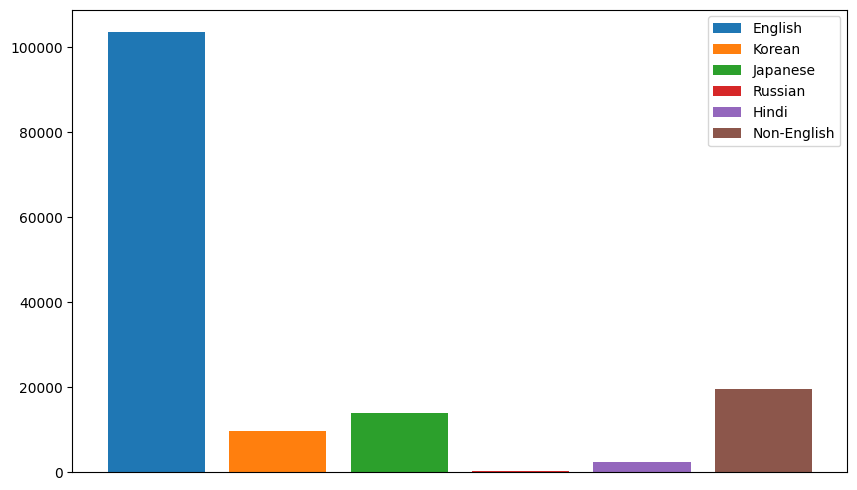

In [47]:
plt.figure(figsize=(10, 6))

width = .5
multiplier = 1.25
x = np.arange(1)

plt.bar(x, Englishdf.size, width, label='English')
plt.bar(x + (width * multiplier), Koreandf.size, width, label='Korean')
plt.bar(x + (width * 2 * multiplier), Japanesedf.size, width, label='Japanese')
plt.bar(x + (width * 3 * multiplier), Russiandf.size, width, label='Russian')
plt.bar((x + width * 4 * multiplier), Hindidf.size, width, label='Hindi')
plt.bar(x + (width * 5 * multiplier), NonEnglishdf.size, width, label='Non-English')
plt.xticks([])
plt.legend()



In [25]:
#Content Type Subsets
Moviedf = df[df['Content Type'] == "Movie"].copy()
Showdf = df[df['Content Type'] == "Show"].copy()

#display(Moviedf)
#display(Showdf)


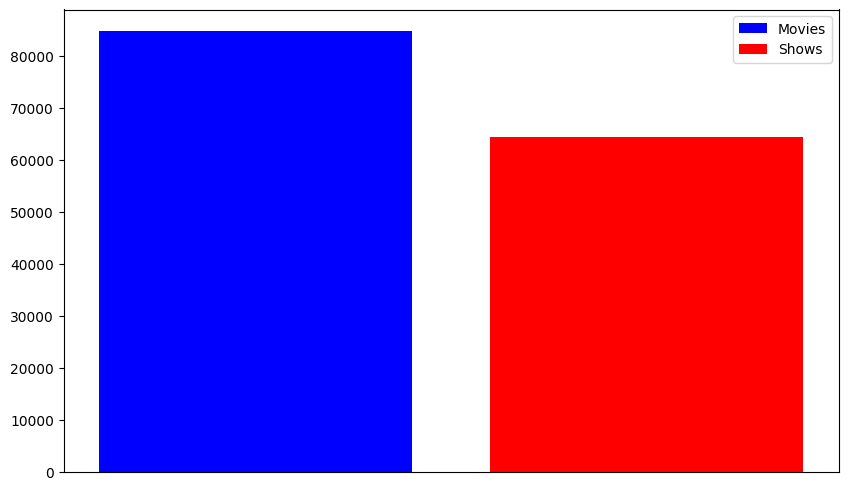

In [67]:
plt.figure(figsize=(10, 6))

width = .5
x = np.arange(1)

plt.bar(x, Moviedf.size, width, label='Movies', color='blue')
plt.bar(x + (width * 1.25), Showdf.size, width, label='Shows', color='red')

plt.xticks([])
plt.legend()



In [49]:
Globaldf = df[df['Available Globally?'] == "Yes"].copy()
NotGlobaldf = df[df['Available Globally?'] == "No"].copy()

#display(Globaldf)
#display(NotGlobaldf)

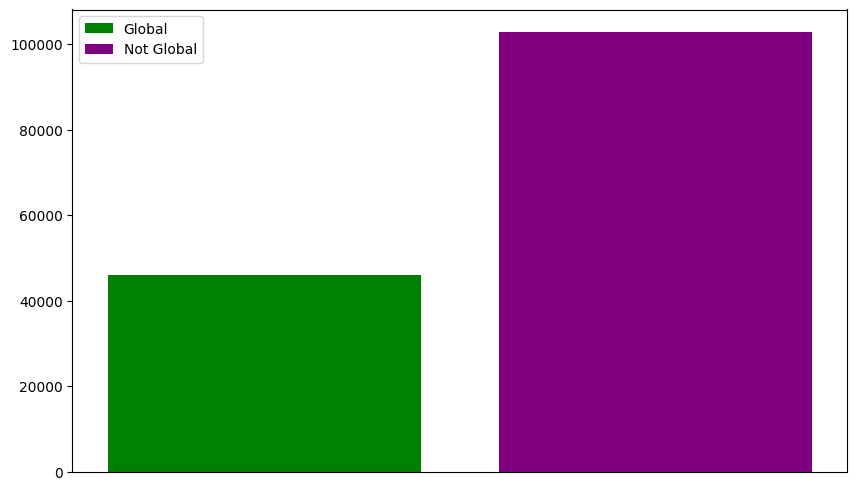

In [69]:
plt.figure(figsize=(10, 6))

width = .5
x = np.arange(1)

plt.bar(x, Globaldf.size, width, label='Global', color='green')
plt.bar(x + (width * 1.25), NotGlobaldf.size, width, label='Not Global', color='purple')

plt.xticks([])
plt.legend()

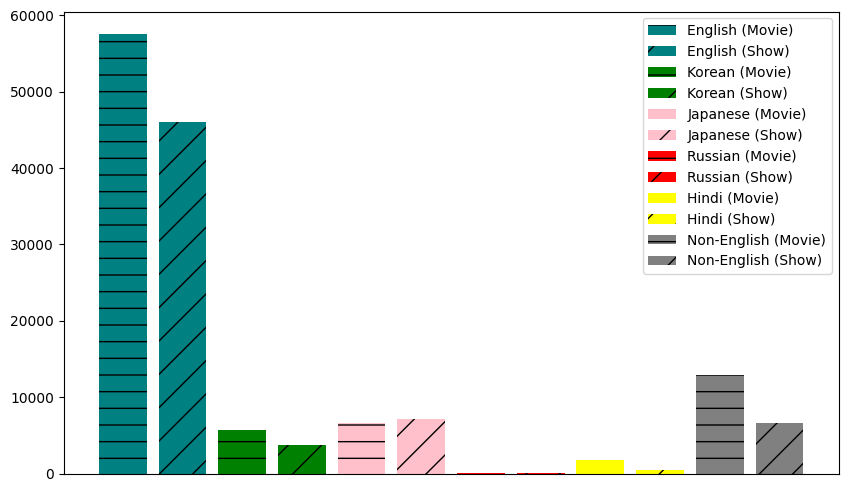

In [70]:
plt.figure(figsize=(10, 6))

width = .25
multiplier = 1.25
x = np.arange(1)
moviehatch = '-'
showhatch = '/'

plt.bar(x, Englishdf[Englishdf['Content Type'] == "Movie"].size, width, label='English (Movie)', hatch=moviehatch, color='teal')
plt.bar(x + width * multiplier, Englishdf[Englishdf['Content Type'] == "Show"].size, width, label='English (Show)', hatch=showhatch, color = 'teal')
plt.bar(x + (width * multiplier * 2), Koreandf[Koreandf['Content Type'] == "Movie"].size, width, label='Korean (Movie)', hatch=moviehatch, color='green')
plt.bar(x + (width * multiplier * 3), Koreandf[Koreandf['Content Type'] == "Show"].size, width, label='Korean (Show)', hatch=showhatch, color='green')
plt.bar(x + (width * 4 * multiplier), Japanesedf[Japanesedf['Content Type'] == "Movie"].size, width, label='Japanese (Movie)', hatch=moviehatch, color='pink')
plt.bar(x + (width * 5 * multiplier), Japanesedf[Japanesedf['Content Type'] == "Show"].size, width, label='Japanese (Show)', hatch=showhatch, color='pink')
plt.bar(x + (width * 6 * multiplier), Russiandf[Russiandf['Content Type'] == "Movie"].size, width, label='Russian (Movie)', hatch=moviehatch, color='red')
plt.bar(x + (width * 7 * multiplier), Russiandf[Russiandf['Content Type'] == "Show"].size, width, label='Russian (Show)', hatch=showhatch, color='red')
plt.bar((x + width * 8 * multiplier), Hindidf[Hindidf['Content Type'] == "Movie"].size, width, label='Hindi (Movie)', hatch=moviehatch, color='yellow')
plt.bar((x + width * 9 * multiplier), Hindidf[Hindidf['Content Type'] == "Show"].size, width, label='Hindi (Show)', hatch=showhatch, color='yellow')
plt.bar(x + (width * 10 * multiplier), NonEnglishdf[NonEnglishdf['Content Type'] == "Movie"].size, width, label='Non-English (Movie)', hatch=moviehatch, color='gray')
plt.bar(x + (width * 11 * multiplier), NonEnglishdf[NonEnglishdf['Content Type'] == "Show"].size, width, label='Non-English (Show)', hatch=showhatch, color='gray')
plt.xticks([])
plt.legend()